In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# Questions to Solve 
1. What genre is most popular? Num of Reviews / Subjects.
3. The relationships between length of courses and num_subscribers( correlation of popularity)
4. The relationships between number of subscribers vs number of reviews.
5. The relationship between price and subscribers. 


In [2]:
df = pd.read_csv('udemy_courses.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
print(df.url.isnull().value_counts())

False    3678
Name: url, dtype: int64


## What gets more reviews unpaid udemy courses or paid udemy courses? 


In [5]:
(df['is_paid']).value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [6]:
paid_reviews= df.groupby(["course_title","is_paid"],as_index=False)['num_reviews'].sum()

## What Course had the most reviews? 

In [7]:
paid_reviews.max()

course_title    ７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー
is_paid                                               True
num_reviews                                          27445
dtype: object

#  What course had the the lowest amount of reviews?

In [8]:
paid_reviews.min()

course_title    #1 Piano Hand Coordination: Play 10th Ballad i...
is_paid                                                     False
num_reviews                                                     0
dtype: object

## How many Courses have 0 Reviews? 

In [9]:
(paid_reviews.num_reviews ==0).value_counts()

False    3380
True      284
Name: num_reviews, dtype: int64

#   # of Courses in Udemy


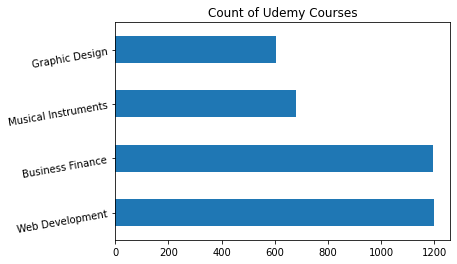

In [10]:
popular = df['subject'].value_counts().plot(kind='barh',title='Count of Udemy Courses',rot=10);



In [11]:
df.sort_values(by='content_duration',ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1658,978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.500000,2016-10-11T21:40:06Z,Graphic Design
3141,548278,The Complete Web Development Course - Build 1...,https://www.udemy.com/complete-web-development...,True,200,7501,1213,384,All Levels,76.500000,2015-11-09T22:01:02Z,Web Development
561,375594,Financial Management - A Complete Study,https://www.udemy.com/financial-management-a-c...,True,190,1941,128,527,All Levels,71.500000,2014-12-22T16:57:30Z,Business Finance
874,167316,TRADER BOT: Introdução à Linguagem MQL5,https://www.udemy.com/intro-mql5/,True,20,209,33,33,All Levels,70.000000,2014-03-07T15:13:45Z,Business Finance
1214,62721,Anatomy for Figure Drawing: Mastering the Huma...,https://www.udemy.com/anatomy-for-figure-drawi...,True,95,15500,754,65,All Levels,68.500000,2013-10-16T11:37:30Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...,...
718,690546,UK Self Assessment Tax Return Filing Online,https://www.udemy.com/uk-tax-return/,True,20,23,7,6,All Levels,0.466667,2015-12-07T18:36:33Z,Business Finance
984,439210,Law Matters,https://www.udemy.com/law-matters/,True,20,327,1,12,Beginner Level,0.450000,2015-03-27T17:16:21Z,Business Finance
448,975074,ALGOTECH Hedge Fund Method for Stock Market Tr...,https://www.udemy.com/algotech-hedge-fund-meth...,True,20,605,19,4,All Levels,0.316667,2016-10-10T21:05:19Z,Business Finance
116,1191504,How to create a routine Trading,https://www.udemy.com/how-to-create-a-trading-...,True,25,307,8,5,All Levels,0.133333,2017-05-01T18:50:43Z,Business Finance


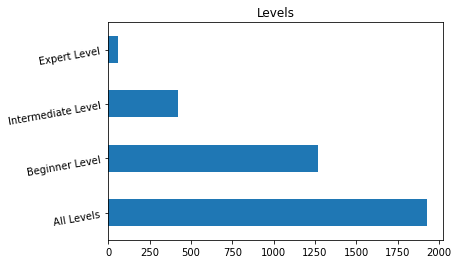

In [12]:
popular = df['level'].value_counts().plot(kind='barh',title='Levels',rot=10);


In [13]:
df.mean(axis=0)

course_id           675971.963295
is_paid                  0.915715
price                   66.049483
num_subscribers       3197.150625
num_reviews            156.259108
num_lectures            40.108755
content_duration         4.094517
dtype: float64

## Average Price of a course is $66.00 from 2011 - 2017

# What genre is most popular? Num of Reviews / Subjects.


In [14]:
popular_genre=df.groupby(["course_title","published_timestamp",'subject'],as_index=False)['num_reviews'].sum()

In [15]:
popular_genre.head()


,course_title,published_timestamp,subject,num_reviews
0,#1 Piano Hand Coordination: Play 10th Ballad i...,2014-09-18T05:07:05Z,Musical Instruments,18
1,#10 Hand Coordination - Transfer Chord Ballad ...,2017-04-12T19:06:34Z,Musical Instruments,1
2,#12 Hand Coordination: Let your Hands dance wi...,2017-04-26T18:34:57Z,Musical Instruments,1
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,2017-02-21T23:48:18Z,Musical Instruments,3
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,2017-02-21T23:44:49Z,Musical Instruments,3


In [16]:
popular_genre.published_timestamp.str.split('T',n=1,expand=True)

,0,1
0,2014-09-18,05:07:05Z
1,2017-04-12,19:06:34Z
2,2017-04-26,18:34:57Z
3,2017-02-21,23:48:18Z
4,2017-02-21,23:44:49Z
...,...,...
3667,2016-12-03,14:55:06Z
3668,2016-12-14,01:25:19Z
3669,2017-02-06,21:39:19Z
3670,2015-11-10,00:22:05Z


In [17]:
new = popular_genre.published_timestamp.str.split('T',n=1,expand=True)


In [18]:
popular_genre['Date'] = new[0]

In [19]:
popular_genre['TimeZone'] = new[1]

In [20]:
popular_genre.drop(columns=['published_timestamp'],inplace=True)

In [21]:
popular_genre.sort_values(by="Date",ascending=True)

,course_title,subject,num_reviews,Date,TimeZone
1982,Javascript for Beginners,Web Development,195,2011-07-09,05:43:31Z
1499,HTML Tutorial: HTML & CSS for Beginners,Web Development,253,2011-09-09,15:28:59Z
428,Become a Web Developer from Scratch,Web Development,2408,2011-11-19,21:51:20Z
2280,Learn jQuery: An In-depth Course For Beginners,Web Development,95,2011-11-29,01:29:11Z
416,Become a Certified Web Developer,Web Development,1090,2011-12-20,15:29:25Z
...,...,...,...,...,...
1322,Forex how traders beat the markest with little...,Business Finance,0,2017-07-06,21:16:13Z
941,Cryptocurrency (BTC & ETH) Investment & Tradin...,Business Finance,0,2017-07-06,21:46:30Z
2688,Photoshop isn't like what you imagine A to Z .,Graphic Design,0,2017-07-06,03:32:48Z
78,ABRSM Grade III Piano Class - Handel Sonatina ...,Musical Instruments,0,2017-07-06,16:12:34Z


In [22]:
popular_genre[popular_genre.Date.between('2011','2012')].max(

SyntaxError: unexpected EOF while parsing (<ipython-input-22-507303bf0b0c>, line 1)

 Most popular course per year.

In [ ]:
pg_2011= popular_genre[popular_genre.Date.between('2011','2012')]
pg_2012=popular_genre[popular_genre.Date.between('2012','2013')]
pg_2013=popular_genre[popular_genre.Date.between('2013','2014')]
pg_2014=popular_genre[popular_genre.Date.between('2014','2015')]
pg_2015=popular_genre[popular_genre.Date.between('2015','2016')]
pg_2016=popular_genre[popular_genre.Date.between('2016','2017')]
pg_2017=popular_genre[popular_genre.Date.between('2017','2018')]

In [ ]:
pg_2017.max()

Most Popular Course is  캔바(Canva)로 SNS 콘텐츠 만들기 of 2017 

In [ ]:
pg_2016.max()

Most Popular Course is 超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜 of 2016 

In [ ]:
pg_2015.max()

Most Popular Course is ７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー of 2015 

In [ ]:
pg_2014.max()

Most Popular Course is 初めてのiDraw入門 of 2014


In [ ]:
pg_2013.max()

Most Popular Course is jQuery UI In Depth 2013

In [ ]:
pg_2012.max()

Most Popular Course is iPhone icons gone awesome 2012

In [ ]:
pg_2011.max()

 Most Popular Course is Learn jQuery: An In-depth Course For Beginners for 2011

## What genre is most popular? Num of Reviews / Subjects.

In [ ]:
df.head()

# The relationships between length of courses and num_subscribers( correlation of popularity

In [23]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [83]:
print(np.corrcoef(df.num_subscribers,df.content_duration))

[[1.         0.16183868]
 [0.16183868 1.        ]]


No relatoinships between subscribers and content_duration

In [84]:
print(np.corrcoef(df.num_subscribers,df.num_reviews))


[[1.         0.64994554]
 [0.64994554 1.        ]]


In [103]:
print(np.corrcoef(df.price,df.num_reviews))


[[1.         0.11369592]
 [0.11369592 1.        ]]


No replationship between price and number of reviews.

No replationship between subscribers and number of reviews.

 Postive relationship between number of subscribers and number of reviews duh.